<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Star_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Loading the dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/6 class csv.csv')

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# About the dataset

From Kaggle: https://www.kaggle.com/datasets/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Dataset's dimensions

In [5]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 7
Number of rows: 240


## Dataset's infos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There is no null value in the intire dataset.

# Column renaming

To make access to dataframe column information, columns are renamed.

In [8]:
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitue', 
              'star_type', 'star_color', 'spectral_class']

In [10]:
df.head()

,temperature,luminosity,radius,absolute_magnitue,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory analysis

## Column `star_type`

There are five different types of stars.

In [11]:
df['star_type'].unique()

array([0, 1, 2, 3, 4, 5])

### Star types count

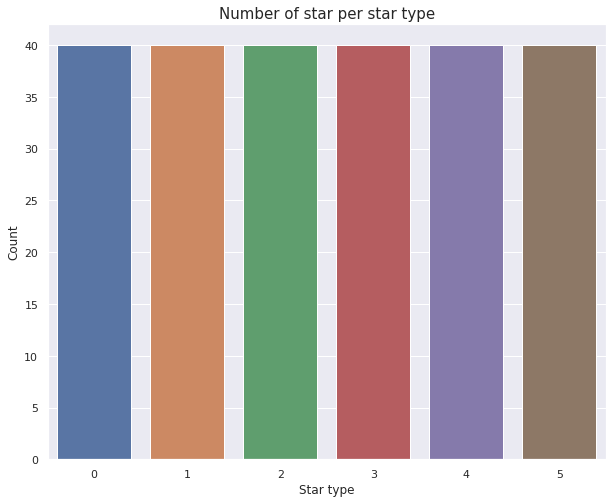

In [19]:
plt.figure(figsize= (10, 8))
ax = sns.countplot(data= df, x= 'star_type')
ax.set_title('Number of star per star type', fontsize= 15)
plt.ylabel('Count')
plt.xlabel('Star type')
plt.show()

## Column `temperature`

The unit of temperature used in the data for this quantity is the Kelvin (K) scale.

### Average, median and mode

In [21]:
pd.DataFrame({'Average': df['temperature'].mean(),
              'Median': df['temperature'].median(),
              'Mode': df['temperature'].mode()[0]},
             index= [0])

,Average,Median,Mode
0,10497.4625,5776.0,3600


### Mean deviation, variance and standard deviation

In [22]:
pd.DataFrame({'Mean deviation': df['temperature'].mad(),
              'Variance': df['temperature'].var(),
              'Standard deviation': df['temperature'].std()},
             index= [0])

,Mean deviation,Variance,Standard deviation
0,7707.765312,9.124882e+07,9552.425037


### Quartiles

In [30]:
pd.DataFrame(df['temperature'].describe()[['25%', '50%', '75%']])

,temperature
25%,3344.25
50%,5776.00
75%,15055.50


### Histogram

* From the intire variable

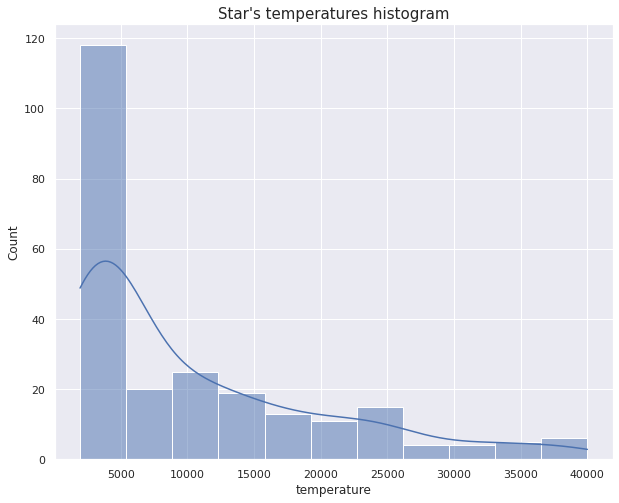

In [25]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True)
ax.set_title("Star's temperatures histogram", fontsize= 15)
plt.show()

* Related to star types

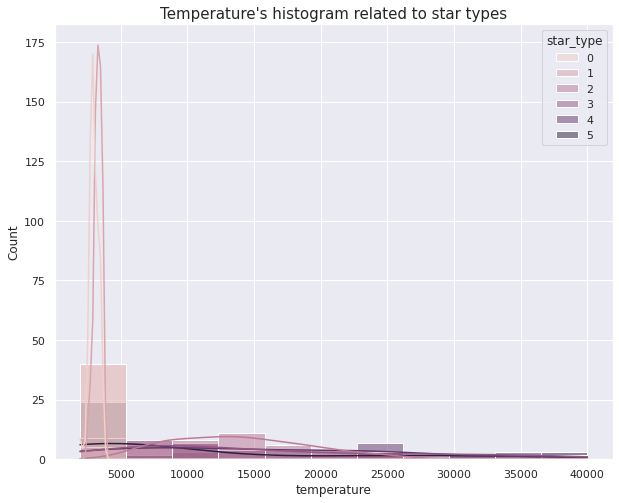

In [28]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True, hue= 'star_type')
ax.set_title("Temperature's histogram related to star types", fontsize= 15)
plt.show()

## Column `luminosity`

### Average, median and mode

In [33]:
pd.DataFrame({'Average': df['luminosity'].mean(),
              'Median': df['luminosity'].median(),
              'Mode': df['luminosity'].mode()[0]}, 
             index= [0])

,Average,Median,Mode
0,107188.361635,0.0705,200000.0


### Mean deviation, variance and standard deviation

In [35]:
pd.DataFrame({'Mean deviation': df['luminosity'].mad(),
              'Variance': df['luminosity'].var(),
              'Standard deviation': df['luminosity'].std()},
             index= [0])

,Mean deviation,Variance,Standard deviation
0,136913.238522,3.219593e+10,179432.24494


### Quartiles

In [36]:
pd.DataFrame(df['luminosity'].describe()[['25%', '50%', '75%']])

,luminosity
25%,0.000865
50%,0.070500
75%,198050.000000


### Histogram

* From the intire variable

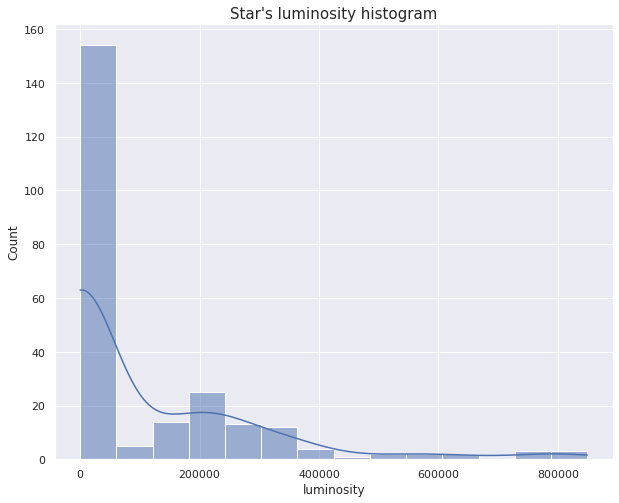

In [38]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True)
ax.set_title(r"Star's luminosity histogram", fontsize= 15)
plt.show()

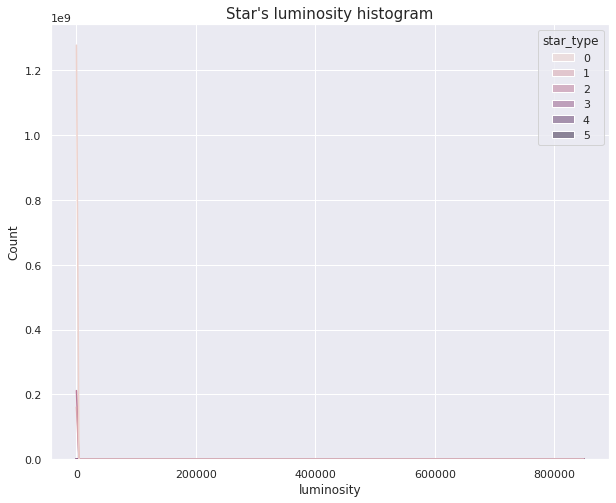

In [39]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True, hue= 'star_type')
ax.set_title(r"Star's luminosity histogram", fontsize= 15)
plt.show()